In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from transformers import pipeline
from itertools import combinations
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.read_csv('/Users/arzumkarahan/Downloads/Final_company_aspect_matrix_with_counts.csv')

Company aspect

In [ ]:
df.head()

,firm,aspect,avg_star_rating,n_mentions
0,AFH Wealth Management,culture,2.769231,13
1,AFH Wealth Management,growth & learning,3.444444,9
2,AFH Wealth Management,hr & recruitment,2.521739,23
3,AFH Wealth Management,job role clarity,1.000000,4
4,AFH Wealth Management,job security,1.400000,5


In [ ]:
len(df)

5201

##### Short EDA for company aspects

In [ ]:
df['n_mentions'].min(), df['n_mentions'].max()

(1, 1237)

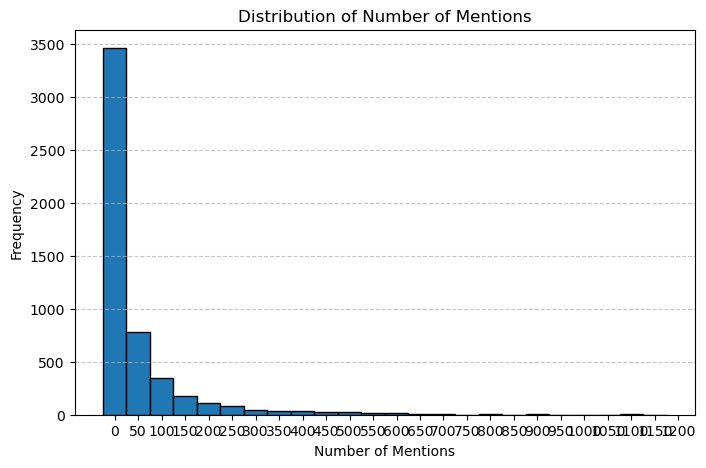

In [ ]:
bins = list(range(0, 1250, 50))

plt.figure(figsize=(8,5))
plt.hist(df['n_mentions'], bins=bins, edgecolor='black', align='left')
plt.title('Distribution of Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
mentions_count = df.groupby('firm')['n_mentions'].sum()
mentions_count.sort_values(ascending=False)

firm
NHS                          8927
Barclays                     8765
EY                           7294
PwC                          7073
Deloitte                     6911
                             ... 
i Net Solution                  5
Office of Rail Regulation       3
Health Protection Agency        2
UKCIL                           1
Tengizchevroil                  1
Name: n_mentions, Length: 332, dtype: int64

In [ ]:
# Count number of aspects per firm
aspect_count = df.groupby('firm')['aspect'].count().reset_index(name='n_aspects')
aspect_count.sort_values('n_aspects', ascending=False)

,firm,n_aspects
331,the LEGO Group,17
134,Guy s and St Thomas NHS Foundation Trust,17
248,SAP,17
245,Royal Mail,17
127,GlaxoSmithKline,17
...,...,...
327,i Net Solution,4
219,Office of Rail Regulation,3
148,Health Protection Agency,1
278,Tengizchevroil,1


In [ ]:
# number of companies having >= 10 aspects:
firms_10 = aspect_count[aspect_count['n_aspects'] >= 10]
len(firms_10)

316

In [ ]:
# number of total reviews for those companies:
list_of_companies = list(firms_10['firm'])

Finding companies that share the same 10 aspects between each other:

In [ ]:
firm_aspects = df.groupby("firm")["aspect"].apply(set)

firm_aspects = firm_aspects[firm_aspects.apply(len) >= 10]

qualified_firms = []

for firm, aspects in firm_aspects.items():
    meets_criteria = True
    for other_firm, other_aspects in firm_aspects.items():
        if firm == other_firm:
            continue
        if len(aspects.intersection(other_aspects)) < 10:
            meets_criteria = False
            break
    if meets_criteria:
        qualified_firms.append(firm)

print("Firms that share ≥10 aspects with ALL other firms (among those with ≥10 aspects):")
print(qualified_firms)
print(len(qualified_firms))

Firms that share ≥10 aspects with ALL other firms (among those with ≥10 aspects):
['AFH Wealth Management', 'AJ Bell', 'ASOS', 'AXA UK', 'Abcam', 'Accenture', 'Accor', 'ActionCOACH', 'Active Care Group', 'Adecco', 'Age UK The National Charity', 'AlixPartners', 'American Express', 'Amey', 'Angard Staffing', 'Anglian Water', 'Anglo American', 'Aon', 'Apple', 'Arcadia', 'Arnold Clark', 'AstraZeneca', 'Aviva', 'B and M Retail', 'B and Q', 'BAT', 'BBC', 'BDO', 'BHS', 'BNP Paribas', 'BNY Mellon', 'BP', 'BPP Holdings', 'BT', 'Babcock International Group', 'Babylon Health', 'Bain and Company', 'Balfour Beatty', 'Bannatyne Group', 'Barchester Healthcare', 'Barclays', 'Barnardo s', 'Barnett Waddingham', 'Barratt Developments', 'Barts Health NHS Trust', 'Bayer', 'Bloomberg L P', 'Blue Arrow', 'Blue Yonder', 'Booking com', 'Boston Consulting Group', 'British Airways', 'British Red Cross', 'Brook Street', 'Bullhorn', 'Bupa', 'Burberry', 'CBRE', 'CVS Group', 'Cambridge Assessment', 'Capita', 'Capita

The shared aspects for the qualified companies:

In [ ]:
qualified_aspect_sets = [firm_aspects[firm] for firm in qualified_firms]

if qualified_aspect_sets:
    shared_aspects = set.intersection(*qualified_aspect_sets)
    print("Shared aspects among all qualified firms:")
    print(sorted(shared_aspects))
else:
    print("No qualified firms found or no shared aspects.")

Shared aspects among all qualified firms:
['culture', 'growth & learning', 'hr & recruitment', 'job role clarity', 'management', 'office & location', 'pay', 'people', 'perks & benefits', 'stress & pressure', 'teamwork & collaboration', 'tools & resources', 'work-life balance']


Number of reviews for those qualified companies:

In [ ]:
# Filter your main dataframe for the qualified firms and the shared aspects
df_qualified_mentions = df[
    df["firm"].isin(qualified_firms) &
    df["aspect"].isin(shared_aspects)
]

# Now sum the number of mentions
total_mentions = df_qualified_mentions["n_mentions"].sum()

# Output result
print(f"Total number of mentions for shared aspects across qualified firms: {total_mentions}")


Total number of mentions for shared aspects across qualified firms: 341226


In [ ]:
df_strict = df[
    df["firm"].isin(qualified_firms) &
    df["aspect"].isin(shared_aspects)
]

# Now find firms that have all 10 aspects
qualified_firms_all_aspects = (
    df_strict.groupby("firm")["aspect"].nunique()
)

final_firms = qualified_firms_all_aspects[
    qualified_firms_all_aspects == len(shared_aspects)
].index.tolist()

print(f"Number of firms meeting requirement: {len(final_firms)}")

# Final filtered dataset
df_final = df_strict[df_strict["firm"].isin(final_firms)].copy()

# Save the file
df_final.to_csv("Extra_filtered_company_aspect_matrix.csv", index=False)

Number of firms meeting requirement: 300
